### Preliminaries: 

In [30]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix)
import sys

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#this will make our arrays print in their entirety instead of truncating
#np.set_printoptions(threshold=sys.maxsize)

In [31]:
#GUIDE: 
    #og_df = original df with all data *don't edit* 
    #df = edited df 
    #sex_df = df sorted by sex (with both prompts) 
    # **gen_df = subset of data with only gender x general prompt **
    # ** ang_df = subset of data with only gender x anger prompt **
    

In [32]:
og_df = pd.read_csv("fake_data.csv")  #load in dataframe 

In [33]:
df = og_df.copy()   #make copy of df to manipulate 

In [34]:
df

,Timestamp,Sex,Age,Sexuality,Race,College,Major,Year,General Prompt,Anger Prompt,word count (prompt 1),word count (prompt 2)
0,2/27/2024 11:58:32,Male,21,Queer/ LGBTQIA+,Asian (including South Asian and Southeast Asian),Fine Arts,Arts and Entertainment Technologies,Senior,This week has been quite eventful! I nailed a ...,"Last week, I felt a surge of anger during a gr...",98,93
1,2/27/2024 12:20:35,Male,19,Queer/ LGBTQIA+,"White, Hispanic/ Latino",Engineering,Aerospace Engineering,Sophomore,This past week was a whirlwind of emotions! I ...,"Recently, anger bubbled up during a heated deb...",95,91
2,2/27/2024 14:04:00,Female,21,Queer/ LGBTQIA+,Hispanic/ Latino,Fine Arts,Art History,Junior,This week has been hectic! I landed an interns...,"Just last week, I experienced a surge of anger...",92,93
3,2/27/2024 14:23:38,Female,21,Straight,White,Liberal Arts,Plan II/Psychology,Senior,This past week has been a whirlwind! I had a b...,"A few days back, I found myself seething with ...",95,100
4,2/27/2024 14:26:31,Female,20,Straight,Asian (including South Asian and Southeast Asian),Natural Sciences,Neuroscience,Sophomore,This week was a rollercoaster of emotions! I l...,"Just recently, I felt a wave of anger during a...",99,96


### Wrangling: 

In [35]:
df = df.drop('Timestamp', axis = 1) #remove timestamp column 
# df = df.drop(index = [18, 37]) # this code was used for our actual dataset and won't be necessary for the fake data

#ignore error msgs 

In [36]:
## binarizing gender column: men = 0, women = 1 
sex_df = df.sort_values("Sex").reset_index()  #sort by gender 
## old code for original data sex_df.loc[0:20, 'Sex'] = 1  #rows 0-20 = 1 for woman
## old code for original data sex_df.loc[21:, 'Sex'] = 0 #rows 21 to end = 0 for man
sex_df.loc[0:2, 'Sex'] = 0
sex_df.loc[2:4, 'Sex'] = 1

In [37]:
sex_df

,index,Sex,Age,Sexuality,Race,College,Major,Year,General Prompt,Anger Prompt,word count (prompt 1),word count (prompt 2)
0,2,0,21,Queer/ LGBTQIA+,Hispanic/ Latino,Fine Arts,Art History,Junior,This week has been hectic! I landed an interns...,"Just last week, I experienced a surge of anger...",92,93
1,3,0,21,Straight,White,Liberal Arts,Plan II/Psychology,Senior,This past week has been a whirlwind! I had a b...,"A few days back, I found myself seething with ...",95,100
2,4,1,20,Straight,Asian (including South Asian and Southeast Asian),Natural Sciences,Neuroscience,Sophomore,This week was a rollercoaster of emotions! I l...,"Just recently, I felt a wave of anger during a...",99,96
3,0,1,21,Queer/ LGBTQIA+,Asian (including South Asian and Southeast Asian),Fine Arts,Arts and Entertainment Technologies,Senior,This week has been quite eventful! I nailed a ...,"Last week, I felt a surge of anger during a gr...",98,93
4,1,1,19,Queer/ LGBTQIA+,"White, Hispanic/ Latino",Engineering,Aerospace Engineering,Sophomore,This past week was a whirlwind of emotions! I ...,"Recently, anger bubbled up during a heated deb...",95,91


In [38]:
#making df for general prompt and anger prompt: 
gen_df = sex_df[["Sex", "General Prompt"]]
ang_df = sex_df[["Sex", "Anger Prompt"]]

In [39]:
gen_df

,Sex,General Prompt
0,0,This week has been hectic! I landed an interns...
1,0,This past week has been a whirlwind! I had a b...
2,1,This week was a rollercoaster of emotions! I l...
3,1,This week has been quite eventful! I nailed a ...
4,1,This past week was a whirlwind of emotions! I ...


### Making the Gendered Prompts Columns

In [40]:
## all female gen 
fem_gen = gen_df[0:2]

In [41]:
fem_gen

,Sex,General Prompt
0,0,This week has been hectic! I landed an interns...
1,0,This past week has been a whirlwind! I had a b...


In [42]:
## all male gen 
men_gen = gen_df[2:4]

In [43]:
## all female anger 
fem_anger = ang_df[0:2]

In [44]:
## all male anger 
men_anger = ang_df[2:4]

### Making Train/Test

In [46]:
## General Train Set
gen_train = pd.concat([fem_gen.iloc[[0]], men_gen.iloc[[0]]])

In [47]:
## General Test Set
gen_test = pd.concat([fem_gen[3:4], men_gen.iloc[[1]]])

In [48]:
## Anger Train Set
ang_train = pd.concat([fem_anger.iloc[[1]], men_anger.iloc[[0]]])

In [49]:
## Anger Test Set
ang_test = pd.concat([fem_anger[3:4], men_anger.iloc[[1]]])

## Data Visualizations: 

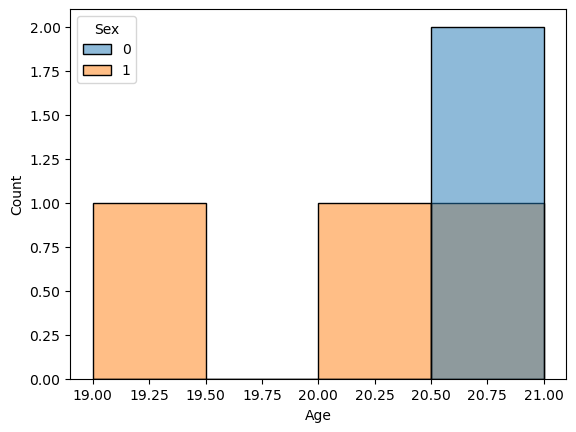

In [50]:
#age hist
sns.histplot(data = sex_df, x = "Age", color = 'pink', hue = 'Sex');

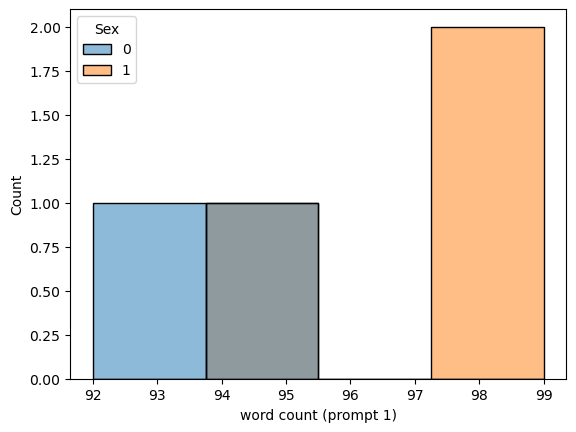

In [51]:
#gen prompt hist
sns.histplot(data= sex_df, x = "word count (prompt 1)", hue = 'Sex');

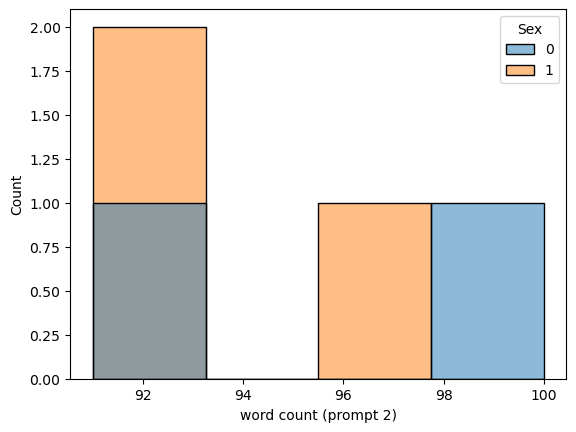

In [52]:
#anger prompt hist
sns.histplot(data= sex_df, x = "word count (prompt 2)", color = 'forestgreen', hue = 'Sex');

### Processing the Text

In [53]:
#import packages
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.tokenize.casual import TweetTokenizer
from nltk.corpus import stopwords
ttokenizer = TweetTokenizer() 

In [54]:
#tokenize our general train responses
gen_train_prompts= [] 
for entry in gen_train["General Prompt"]: 
    tokenized_entry = ttokenizer.tokenize(entry)
    gen_train_prompts.append(tokenized_entry)

In [55]:
#tokenize our general test responeses
gen_test_prompts= [] 
for entry in gen_test["General Prompt"]: 
    tokenized_entry = ttokenizer.tokenize(entry)
    gen_test_prompts.append(tokenized_entry)

In [56]:
#tokenize our angry train responeses
ang_train_prompts = [] 
for entry in ang_train["Anger Prompt"]: 
    tokenized_entry = ttokenizer.tokenize(entry)
    ang_train_prompts.append(tokenized_entry)

In [57]:
#tokenize our angry test responeses
ang_test_prompts = [] 
for entry in ang_test["Anger Prompt"]: 
    tokenized_entry = ttokenizer.tokenize(entry)
    ang_test_prompts.append(tokenized_entry)

### Proceessing the Gendered Text:

In [58]:
#function for removing stop words: 
def remove_stop_words(df): 
    responses_without_stop = []
    
    for entry in df:
        text_with_stop_words = entry
        text_without_stop_words = [word for word in text_with_stop_words if word not in stopwords.words("english")]
        responses_without_stop.append(text_without_stop_words)
    return(responses_without_stop)

In [59]:
fem_gen_prompts = [] 
for entry in fem_gen["General Prompt"]: 
    tokenized_entry = ttokenizer.tokenize(entry)
    fem_gen_prompts.append(tokenized_entry)
    
fem_gen_list = remove_stop_words(fem_gen_prompts)


In [60]:
fem_ang_prompts = [] 
for entry in fem_anger["Anger Prompt"]: 
    tokenized_entry = ttokenizer.tokenize(entry)
    fem_ang_prompts.append(tokenized_entry)
    
fem_ang_list = remove_stop_words(fem_ang_prompts)


In [61]:
men_gen_prompts = [] 
for entry in men_gen["General Prompt"]: 
    tokenized_entry = ttokenizer.tokenize(entry)
    men_gen_prompts.append(tokenized_entry)
    
men_gen_list = remove_stop_words(men_gen_prompts)


In [62]:
men_ang_prompts = [] 
for entry in men_anger["Anger Prompt"]: 
    tokenized_entry = ttokenizer.tokenize(entry)
    men_ang_prompts.append(tokenized_entry)
    
men_ang_list = remove_stop_words(men_ang_prompts)


### Cleaning entries

In [63]:
## function for unigram freq: 
def unigram_frequency(list): 
    #create lists to store unigram frequency
    unigram_freqs = []

    #for each entry, calculate n-grams and frequency, then store in respective list 
    for entry in list: 
        unigram_frequency_distribution = nltk.FreqDist(entry)
        unigrams = [ (unigram, unigram_frequency_distribution[unigram]) for unigram in unigram_frequency_distribution ]
        unigram_freqs.append(unigrams)
    return unigram_freqs

In [64]:
# function for unigram vocab: 
def unigram_vocab(freqs_list):
    vocab = [] 

    #for each entry, add every unigram to the unigram vocab
    for entry in freqs_list:
        for x in entry:
            unigram = x[0]
            vocab.append(unigram)
    return vocab

In [65]:
# function to create feature array based on vocab and freq of unigram
def unigram_features(data,vocab):
    features = []
    
    for entry in data: 
        freqs = [0] * len(vocab)
        #for each unigram in tweet, replace frequency in instance list with frequency
        for x in entry:
            unigram = x[0]
            freq = x[1]
            freqs[vocab.index(unigram)] = freq
        #append instance frequency list to features array
        features.append(freqs)
    
    return features

### Unigram Feature: 
- unigram_frequency
- unigram_vocab
- append into master list 
- unigram_features 

In [66]:
## removing stop words from all dfs: 
gen_train_list = remove_stop_words(gen_train_prompts)
gen_test_list = remove_stop_words(gen_test_prompts)
ang_train_list = remove_stop_words(ang_train_prompts)
ang_test_list = remove_stop_words(ang_test_prompts)

In [67]:
#Making frequency list of each individual set
gen_train_freq = unigram_frequency(gen_train_list) 
gen_test_freq = unigram_frequency(gen_test_list) 
ang_train_freq = unigram_frequency(ang_train_list) 
ang_test_freq = unigram_frequency(ang_test_list) 

In [68]:
#Making vocab list of each individual set
gen_train_vocab = unigram_vocab(gen_train_freq) 
gen_test_vocab = unigram_vocab(gen_test_freq) 
ang_train_vocab = unigram_vocab(ang_train_freq) 
ang_test_vocab = unigram_vocab(ang_test_freq) 

In [69]:
#Making master list of each vocab list 
vocabularies = [gen_train_vocab, gen_test_vocab, ang_train_vocab, ang_test_vocab]

# Master list to store all vocabularies
master_list = []

# Loop through each vocabulary and append it to the master_list
for vocab in vocabularies:
    master_list.extend(vocab)

master_list = sorted(list(set(master_list)))

In [70]:
#Making features arrays 
gen_train_feat = unigram_features(gen_train_freq, master_list) 
gen_test_feat = unigram_features(gen_test_freq, master_list) 
ang_train_feat = unigram_features(ang_train_freq, master_list) 
ang_test_feat = unigram_features(ang_test_freq, master_list) 

### Making the Labels: 

In [71]:
gen_train_labels = gen_train['Sex'].tolist()
gen_test_labels = gen_test['Sex'].tolist()
ang_train_labels = ang_train['Sex'].tolist()
ang_test_labels = ang_test['Sex'].tolist()

### Predictive Model based on Unigrams

The confusion matrix displays the following information for us:

|  | **Prediction = 0/Male**   | **Prediction = 1/Female** |
|  ----   | -------- | ------- |
|**Actual = 0/Male** | True Male  | False Female  |
| **Actual = 1/Male**|False Male | True Female    |

We will train a logistic regression model for the general prompt responses and anger prompt responses, then test both models on a respective test set. We will also compute accuracy scores and print a confusion matrix to analyze further. 

### Hypothesis 1: Unigrams

In [72]:
#gen model and test

#using L2 regularisation
lm_log_gen = LogisticRegression().fit(gen_train_feat, gen_train_labels)

test_pred = lm_log_gen.predict(gen_test_feat)  
print(test_pred)
test_pred_round = np.round(test_pred)

gen_cf_matrix = confusion_matrix(gen_test_labels, test_pred_round) 

#print accuracy and confusion matrix
print('Test accuracy: ', accuracy_score(gen_test_labels, test_pred_round))
print ("Confusion Matrix : \n", confusion_matrix(gen_test_labels, test_pred_round) ) 

[0]
Test accuracy:  0.0
Confusion Matrix : 
 [[0 0]
 [1 0]]


In [73]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    plt.xticks(np.arange(2), ['Male', 'Female'], fontsize = 10)
    plt.yticks(np.arange(2), ['Male', 'Female'], fontsize = 10)
    
    thresh = cm.max() / 1.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     fontsize = 15,
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual', fontsize = 12)
    plt.xlabel('Predicted', fontsize = 12)
    plt.tight_layout()
    


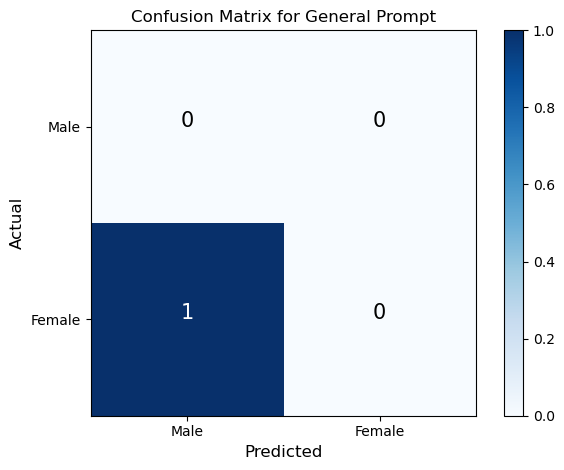

In [74]:
cf_plt1 = plot_confusion_matrix(gen_cf_matrix, "Confusion Matrix for General Prompt" )

In [75]:
#anger model and test
lm_log_ang = LogisticRegression().fit(ang_train_feat, ang_train_labels)

test_pred = lm_log_gen.predict(ang_test_feat)  
print(test_pred)
test_pred_round = np.round(test_pred)

#print accuracy and confusion matrix
print('Test accuracy: ', accuracy_score(ang_test_labels, test_pred_round))
print ("Confusion Matrix : \n", confusion_matrix(ang_test_labels, test_pred_round) ) 
ang_cf_matrix = confusion_matrix(ang_test_labels, test_pred_round)

[1]
Test accuracy:  1.0
Confusion Matrix : 
 [[1]]


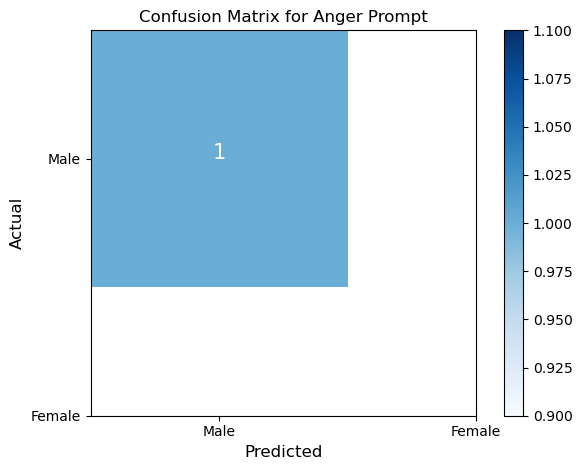

In [76]:
cf_plt_2 = plot_confusion_matrix(ang_cf_matrix, title = "Confusion Matrix for Anger Prompt") 

### Hypothesis 2: Parts of Speech 

In [77]:
from nltk.tag import pos_tag

def count_pos(tokenized_text): 
    text_as_pos = []
    pos_list = pos_tag(tokenized_text)
    for entry in pos_list:
        pos = entry[1]
        text_as_pos.append(pos)
    return text_as_pos

def count_pos_list(tokenized_text_list):
    all_pos = []   
    for text in tokenized_text_list:
        text_as_pos = []
        pos_list = pos_tag(text)
        for entry in pos_list:
            pos = entry[1]
            text_as_pos.append(pos)
        
        all_pos.append(text_as_pos) 
    return all_pos


In [78]:
gen_train_pos = unigram_frequency(count_pos_list(gen_train_prompts))
gen_test_pos = unigram_frequency(count_pos_list(gen_test_prompts))
ang_train_pos = unigram_frequency(count_pos_list(ang_train_prompts))
ang_test_pos = unigram_frequency(count_pos_list(ang_test_prompts))

In [79]:
gen_train_pos_vocab = unigram_vocab(gen_train_pos)
gen_test_pos_vocab = unigram_vocab(gen_test_pos)
ang_train_pos_vocab = unigram_vocab(ang_train_pos)
ang_test_pos_vocab = unigram_vocab(ang_test_pos)

In [80]:
#gendered pos freq
fem__gen_pos_freq = unigram_frequency(count_pos_list(fem_gen_list))
fem_ang_pos_freq = unigram_frequency(count_pos_list(fem_ang_list))
men_gen_pos_freq = unigram_frequency(count_pos_list(men_gen_list))
men_ang_pos_freq = unigram_frequency(count_pos_list(men_ang_list))


In [81]:
#Making master list of each vocab list 
pos_vocabularies = [gen_train_pos_vocab, gen_test_pos_vocab, ang_train_pos_vocab, ang_test_pos_vocab]

# Master list to store all vocabularies
master_pos_list = []

# Loop through each vocabulary and append it to the master_list
for pos_vocab in pos_vocabularies:
    master_pos_list.extend(pos_vocab)

master_pos_list = sorted(list(set(master_pos_list)))

In [82]:
gen_train_pos_feat = unigram_features(gen_train_pos, master_pos_list)
gen_test_pos_feat = unigram_features(gen_test_pos, master_pos_list)
ang_train_pos_feat = unigram_features(ang_train_pos, master_pos_list)
ang_test_pos_feat = unigram_features(ang_test_pos, master_pos_list)

In [83]:
#gen model and test

#using L2 regularisation
lm_log_gen_pos = LogisticRegression().fit(gen_train_pos_feat, gen_train_labels)

test_pred = lm_log_gen_pos.predict(gen_test_pos_feat)  
print(test_pred)
test_pred_round = np.round(test_pred)

#print accuracy and confusion matrix
print('Test accuracy: ', accuracy_score(gen_test_labels, test_pred_round))
print ("Confusion Matrix : \n", confusion_matrix(gen_test_labels, test_pred_round) ) 
gen_pos_cf = confusion_matrix(gen_test_labels, test_pred_round)

[1]
Test accuracy:  1.0
Confusion Matrix : 
 [[1]]


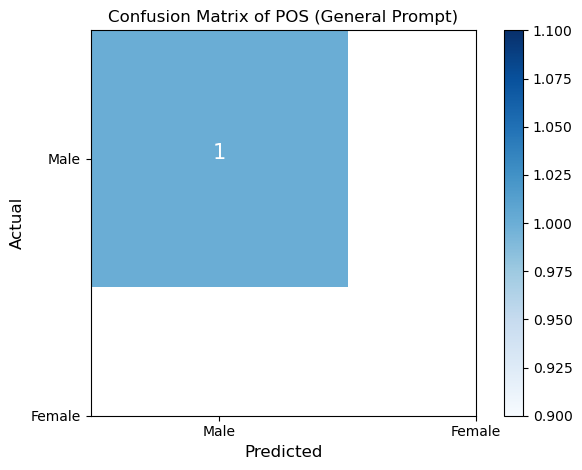

In [84]:
plot_confusion_matrix(gen_pos_cf, title = "Confusion Matrix of POS (General Prompt)") 

In [85]:
#ang model and test

#using L2 regularisation
lm_log_ang_pos = LogisticRegression().fit(ang_train_pos_feat, ang_train_labels)

test_pred = lm_log_ang_pos.predict(ang_test_pos_feat)  
print(test_pred)
test_pred_round = np.round(test_pred)

#print accuracy and confusion matrix
print('Test accuracy: ', accuracy_score(ang_test_labels, test_pred_round))
print ("Confusion Matrix : \n", confusion_matrix(ang_test_labels, test_pred_round) )
ang_pos_cf = confusion_matrix(ang_test_labels, test_pred_round)

[1]
Test accuracy:  1.0
Confusion Matrix : 
 [[1]]


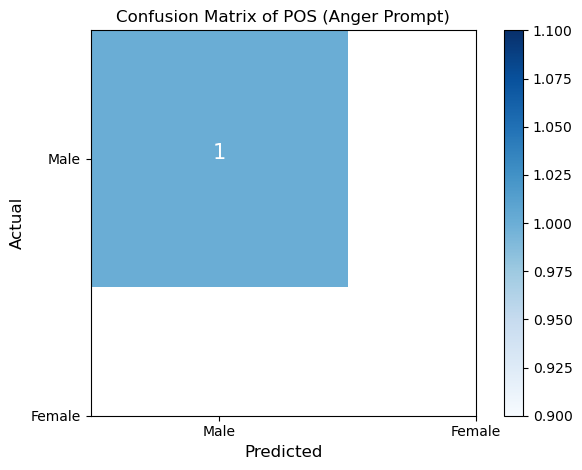

In [86]:
plot_confusion_matrix(ang_pos_cf, title = "Confusion Matrix of POS (Anger Prompt)") 

## Hypothesis 3: Testing for Valence Differences

In [87]:
with open("data/a1/warriner_valence.csv", "r", encoding ="utf8") as f:
    all_text = f.read() # read in the whole file.

# split into each lines, by splitting on the new-line character
all_lines = all_text.split('\n')

warriner_dict = {}
for this_line in all_lines:
    this_word, val_score = this_line.split(',')
    warriner_dict[this_word] = val_score

def warriner_score (text):

    t = text.split()

    warriner_list = [0] #instantiate list so there is at least one element in the list 

    for word in t:
        if word in warriner_dict:
            score = float(warriner_dict[word]) #convert warriner score to numeric
            warriner_list.append(score)

    if warriner_list != [0]:
        warrinerScore = sum(warriner_list) / (len(warriner_list) - 1) #calculate the warriner score excluding initial zero
    else: warrinerScore = 0 #if no words in review are in warriner list, set warrinerScore = 0

    return warrinerScore

def warriner_score_list(prompts):
    ws_list = []
    for entry in prompts:
        ws = warriner_score(entry)
        ws_list.append(ws)
    return ws_list

In [88]:
fem_gen_valence = warriner_score_list(fem_gen["General Prompt"])
fem_ang_valence = warriner_score_list(fem_anger["Anger Prompt"])
men_gen_valence = warriner_score_list(men_gen["General Prompt"])
men_ang_valence = warriner_score_list(men_anger["Anger Prompt"])

In [89]:
print(np.var(fem_gen_valence), np.var(men_gen_valence))


0.026136111111111096 0.01631909471131765


In [90]:
import scipy.stats as stats 


In [91]:
stats.ttest_ind(fem_gen_valence, men_gen_valence, equal_var= False)



Ttest_indResult(statistic=0.9830368290910116, pvalue=0.43393542388124995)

In [92]:
stats.ttest_ind(fem_ang_valence, men_ang_valence, equal_var= False)


Ttest_indResult(statistic=0.182305906821851, pvalue=0.8805543050259919)

In [93]:
from scipy.stats import shapiro

In [95]:
#sample dataset is too small to run this statistic 

#statistic, p_value = shapiro(men_gen_valence)

#print("Shapiro-Wilk Test Statistic:", statistic)
#print("p-value:", p_value)


### Visualizations

In [96]:
from wordcloud import WordCloud


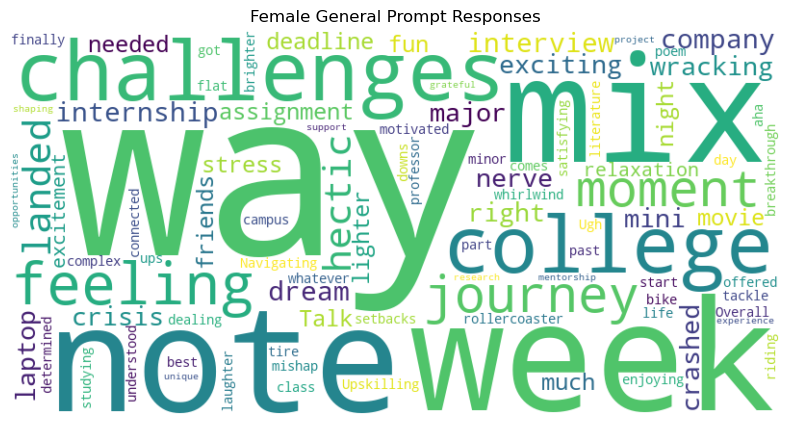

In [97]:
#make wordcloud of female general responses
gen_list = []
for entry in fem_gen_list: 
    for word in entry: 
        gen_list.append(word)
    gen_string = ' '.join(gen_list)

        
plt_1 = WordCloud(width=800, height=400, background_color='white').generate(gen_string)
plt.figure(figsize=(10, 5))
plt.imshow(plt_1, interpolation='bilinear')
plt.axis('off')
plt.title('Female General Prompt Responses')
plt.show()

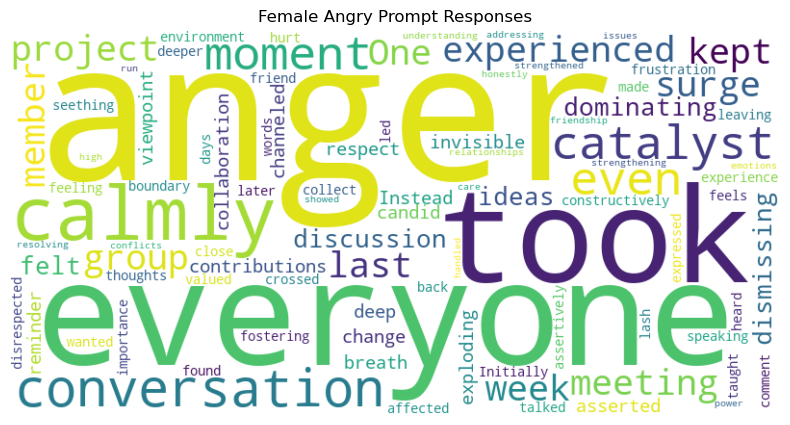

In [98]:
#make wordcloud of female angry responses

gen_list = []
for entry in fem_ang_list: 
    for word in entry: 
        gen_list.append(word)
    gen_string = ' '.join(gen_list)

        
plt_2  = WordCloud(width=800, height=400, background_color='white').generate(gen_string)
plt.figure(figsize=(10, 5))
plt.imshow(plt_2, interpolation='bilinear')
plt.axis('off')
plt.title('Female Angry Prompt Responses')
plt.show()

(-0.5, 799.5, 399.5, -0.5)

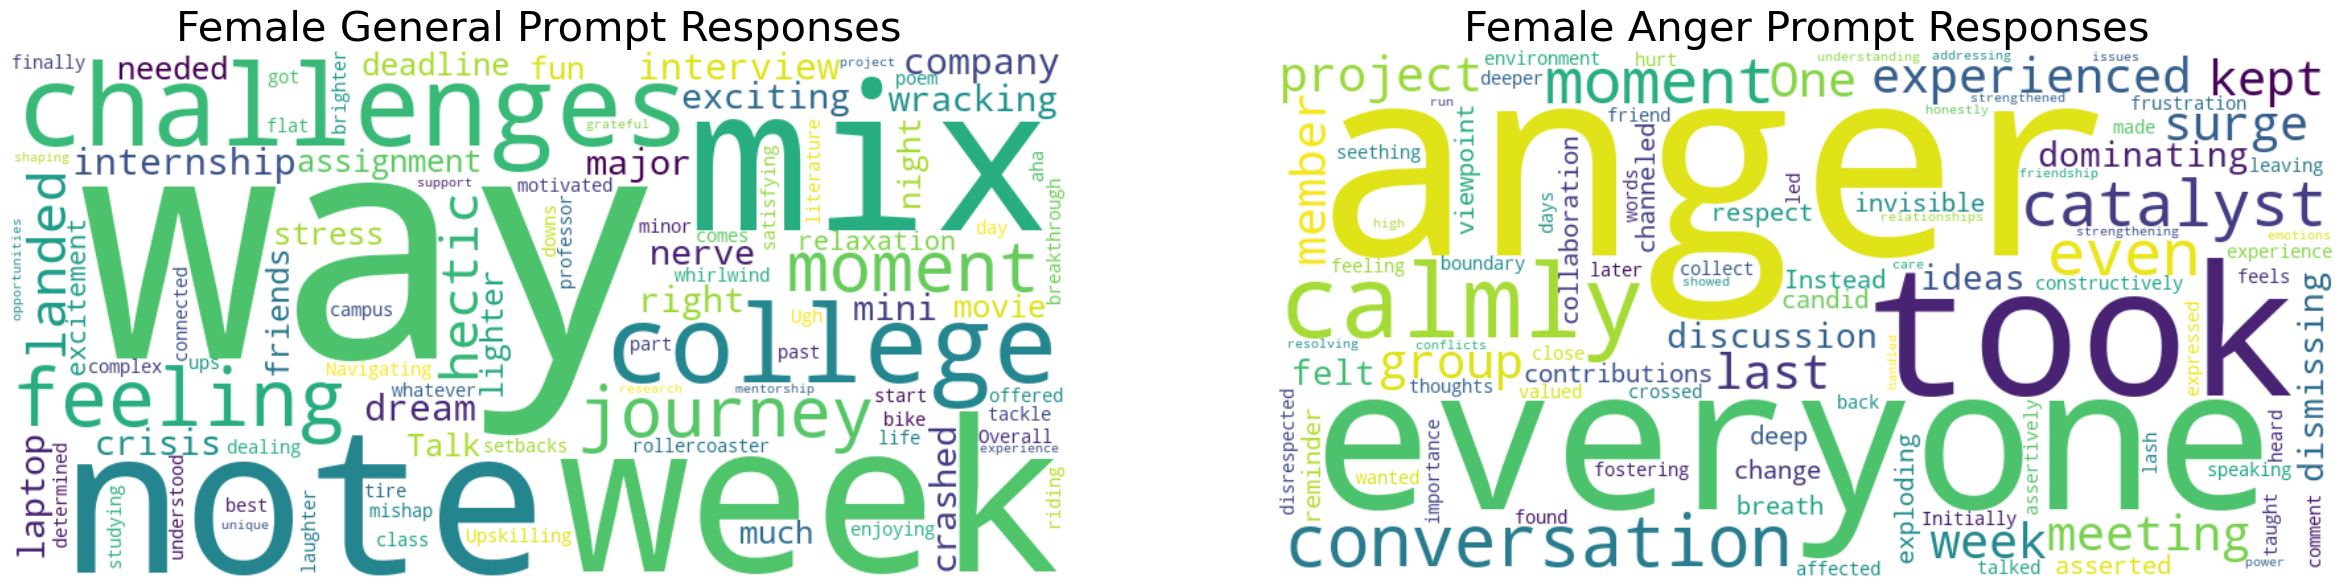

In [99]:
## combine figures into same plot 

fig, axes = plt.subplots(1, 2, figsize=(30, 15))
axes[0].imshow(plt_1, interpolation='bilinear')
axes[0].set_title('Female General Prompt Responses', fontsize = 30)
axes[0].axis('off')

# Plot second WordCloud on the second subplot
axes[1].imshow(plt_2, interpolation='bilinear')
axes[1].set_title('Female Anger Prompt Responses', fontsize = 30)
axes[1].axis('off')


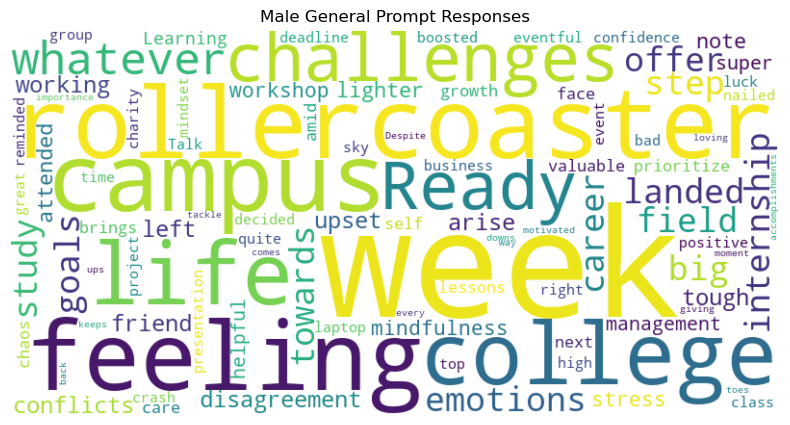

In [100]:
#make wordcloud of male general responses

gen_list = []
for entry in men_gen_list: 
    for word in entry: 
        gen_list.append(word)
    gen_string = ' '.join(gen_list)

        
plt_3 = WordCloud(width=800, height=400, background_color='white').generate(gen_string)
plt.figure(figsize=(10, 5))
plt.imshow(plt_3, interpolation='bilinear')
plt.axis('off')
plt.title('Male General Prompt Responses', )
plt.show()

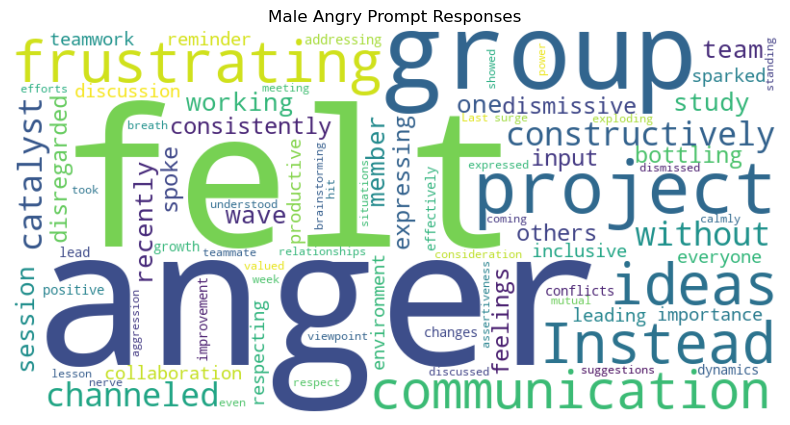

In [101]:
#make wordcloud of male angry responses

gen_list = []
for entry in men_ang_list: 
    for word in entry: 
        gen_list.append(word)
    gen_string = ' '.join(gen_list)

        
plt_4 = WordCloud(width=800, height=400, background_color='white').generate(gen_string)
plt.figure(figsize=(10, 5))
plt.imshow(plt_4, interpolation='bilinear')
plt.axis('off')
plt.title('Male Angry Prompt Responses')
plt.show()

(-0.5, 799.5, 399.5, -0.5)

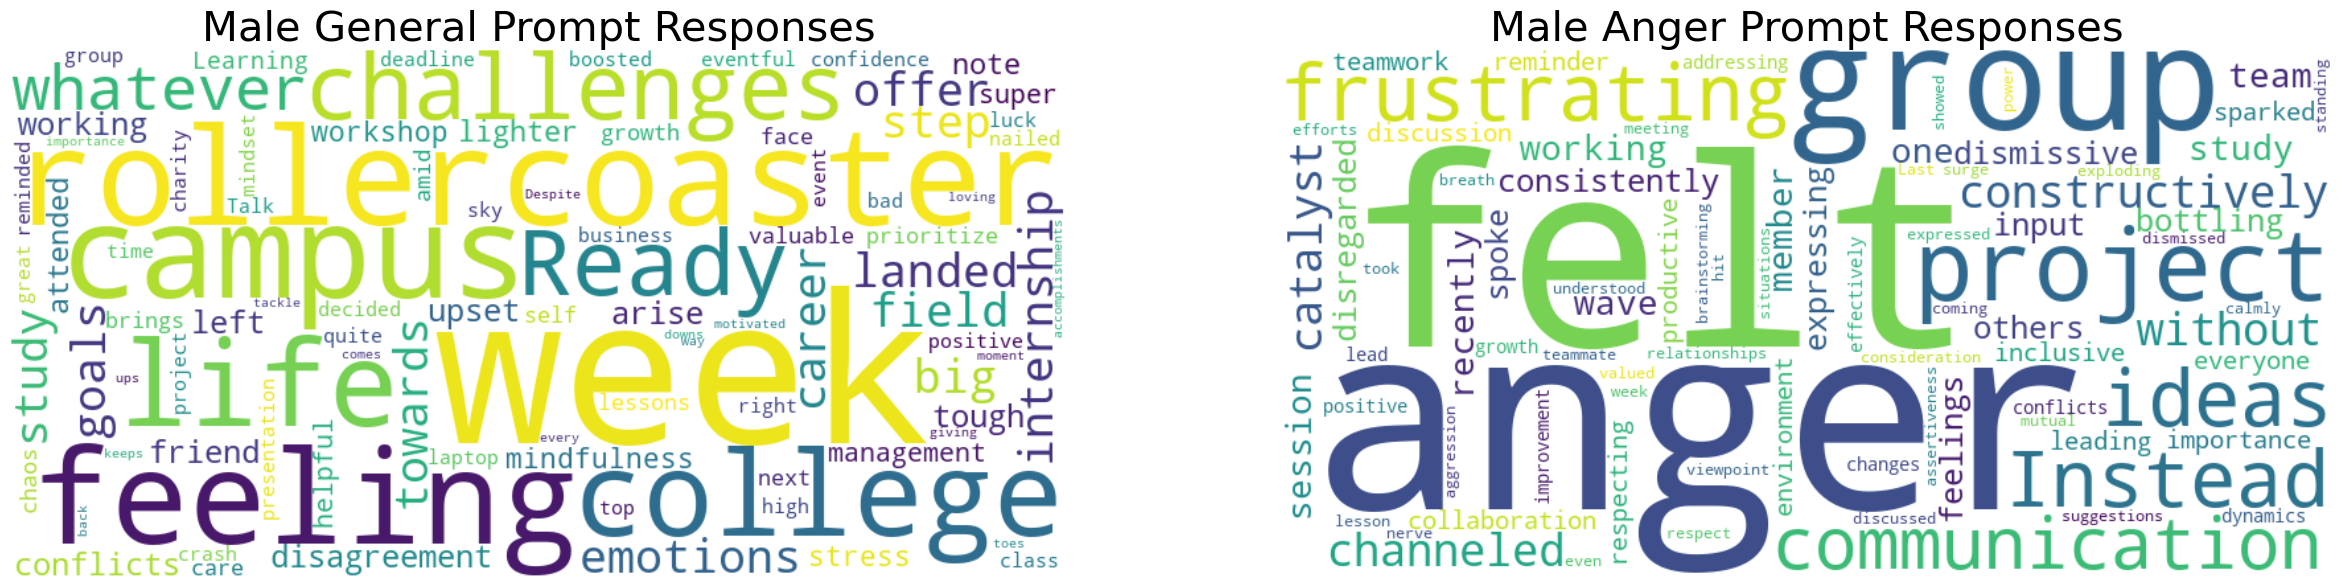

In [102]:
## combine figures into same plot 

fig, axes = plt.subplots(1, 2, figsize=(30, 15))
axes[0].imshow(plt_3, interpolation='bilinear')
axes[0].set_title('Male General Prompt Responses', fontsize = 30)
axes[0].axis('off')

# Plot second WordCloud on the second subplot
axes[1].imshow(plt_4, interpolation='bilinear')
axes[1].set_title('Male Anger Prompt Responses', fontsize = 30)
axes[1].axis('off')


#### T-test visualization

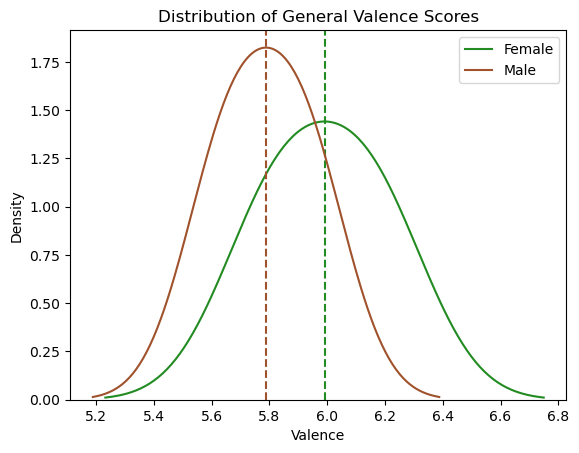

In [103]:
fem_gen_mean = np.mean(fem_gen_valence)
men_gen_mean = np.mean(men_gen_valence)


kde1 = sns.kdeplot(data=fem_gen_valence, label='Female', color='forestgreen')
plt.axvline(x=fem_gen_mean, color='forestgreen', linestyle='--')  


kde2 = sns.kdeplot(data=men_gen_valence, label='Male', color='#A0522D')
plt.axvline(x=men_gen_mean, color='#A0522D', linestyle='--') 

# Set plot title and labels
plt.title('Distribution of General Valence Scores')
plt.xlabel('Valence')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show plot
plt.show()

#plt.savefig('gen_valence_dist.png')



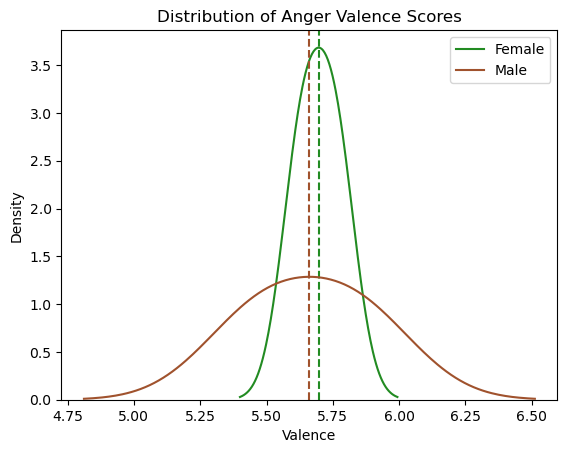

In [104]:
fem_ang_mean = np.mean(fem_ang_valence)
men_ang_mean = np.mean(men_ang_valence)


kde3 = sns.kdeplot(data=fem_ang_valence, label='Female', color='forestgreen')
plt.axvline(x=fem_ang_mean, color='forestgreen', linestyle='--')  


kde4 = sns.kdeplot(data=men_ang_valence, label='Male', color='#A0522D')
plt.axvline(x=men_ang_mean, color='#A0522D', linestyle='--') 

# Set plot title and labels
plt.title('Distribution of Anger Valence Scores')
plt.xlabel('Valence')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show plot
plt.show()

##plt.savefig('gen_valence_dist.png')


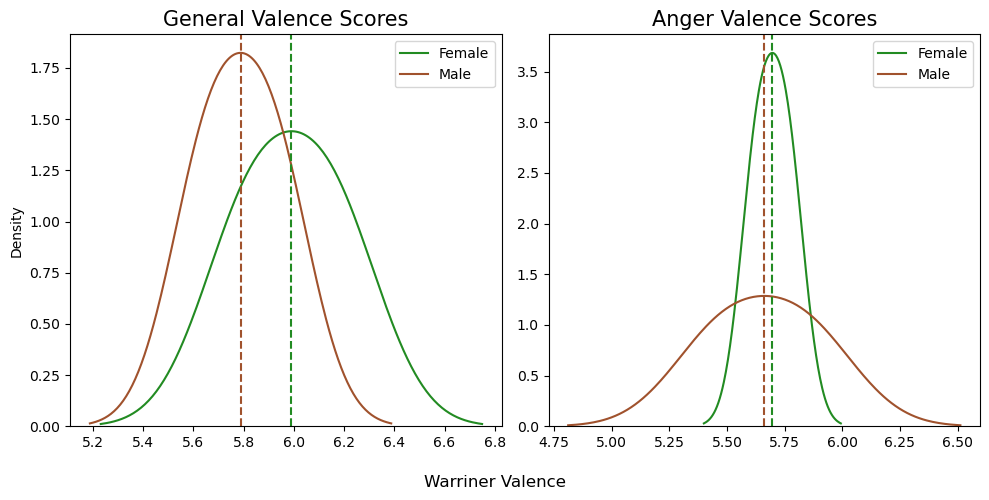

In [105]:
##combining plots 
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.kdeplot(data=fem_gen_valence, label='Female', color='forestgreen', ax = axes[0])
sns.kdeplot(data=men_gen_valence, label='Male', color='#A0522D', ax = axes[0])
axes[0].axvline(x=fem_gen_mean, color='forestgreen', linestyle='--')  
axes[0].axvline(x=men_gen_mean, color='#A0522D', linestyle='--') 

axes[0].set_title('General Valence Scores', fontsize = 15)
axes[0].legend()


sns.kdeplot(data=fem_ang_valence, label='Female', color='forestgreen', ax = axes[1])
sns.kdeplot(data=men_ang_valence, label='Male', color='#A0522D',ax = axes[1] )
plt.axvline(x=fem_ang_mean, color='forestgreen', linestyle='--')
plt.axvline(x=men_ang_mean, color='#A0522D', linestyle='--')
axes[1].set_title('Anger Valence Scores', fontsize = 15)
axes[1].set_ylabel('')

axes[1].legend()
fig.supxlabel('Warriner Valence')

plt.tight_layout()